<a href="https://colab.research.google.com/github/Fabiane-Gaspar/MVP_An-lise_Exploratoria_Recilagem_Global/blob/main/An%C3%A1lise_Explorat%C3%B3ria_Res%C3%ADduos_Pl%C3%A1sticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

Nome: Fabiane Cerino Gaspar

Matrícula: 4052024001771

Dataset: https://drive.google.com/file/d/1iRoCKXwquRQ_LWXCszQUu-CS4Oeplsjz/view?usp=sharing

# 1. Introdução

ANÁLISE EXPLORATÓRIA DE RESÍDUOS PLÁSTICOS GLOBAIS

1. Descrição do Problema:
O acúmulo de resíduos plásticos tornou-se uma crise ambiental global, com:
- 400 milhões de toneladas produzidas anualmente
- Apenas 9% sendo efetivamente reciclados
- 11 milhões de toneladas chegando aos oceanos a cada ano

Este trabalho analisa padrões de geração, reciclagem e risco ambiental do lixo plástico em 175 países.

2. Hipóteses do Problema:

H1: Países com maior PIB per capita geram mais resíduos plásticos

H2: Taxas de reciclagem são menores em países com alto risco costeiro

H3: Fontes industriais têm maiores taxas de reciclagem que embalagens de consumo

H4: Existe correlação negativa entre produção total e eficiência na reciclagem


3. Tipo de Problema:
Classificação como análise exploratória de dados (EDA) com componentes de:
- Análise descritiva (distribuições, tendências)
- Análise comparativa (entre países/regiões)
- Análise de correlação (entre variáveis)

4. Seleção de Dados:

Dataset: "Plastic Waste Around the World.csv"

Origem: Compilação de relatórios da ONU, Banco Mundial e OCDE (2019-2022)

Critérios de seleção:

- Países com dados completos
- Métricas padronizadas (toneladas métricas)
- Fontes verificáveis


5. Atributos do Dataset:
1. Country: Nome do país (categórico)
2. Total_Plastic_Waste_MT: Resíduos plásticos totais (milhões de toneladas/contínuo)
3. Main_Sources: Principais fontes geradoras (categórico)
4. Recycling_Rate: % de resíduos reciclados (contínuo)
5. Per_Capita_Waste_KG: Geração per capita (kg/habitante/contínuo)
6. Coastal_Waste_Risk: Risco de poluição costeira (ordinal: Low, Medium, High, Very_High)

# 2. Blocos de Análise
2.1 Pré-processamento

In [24]:
# Importando bibliotecas
# pandas: Para manipulação e análise de dados em formato de tabelas
import pandas as pd
# matplotlib.pyplot: Para criação de gráficos e visualizações básicas
import matplotlib.pyplot as plt
# seaborn: Para gráficos estatísticos mais avançados e atrativos
import seaborn as sns
# numpy: Para cálculos numéricos e operações matemáticas
import numpy as np

In [25]:
# 1. CARREGANDO OS DADOS
dados = pd.read_csv('/content/drive/MyDrive/Plastic Waste Around the World.csv')#caminho do arquivo e leitura

In [26]:
# Imprime um cabeçalho para identificar a seção de visualização das primeiras linhas
print("\n=== Primeiras linhas ===")
# Mostra as primeiras 5 linhas do DataFrame 'dados'
# - Útil para verificar se os dados foram carregados corretamente
# - Mostra a estrutura básica (nomes das colunas e primeiros valores)
print(dados.head())


=== Primeiras linhas ===
         Country  Total_Plastic_Waste_MT           Main_Sources  \
0          China                   59.08   Packaging_Industrial   
1  United States                   42.02     Packaging_Consumer   
2          India                   26.33         Consumer_Goods   
3          Japan                    7.99  Packaging_Electronics   
4        Germany                    6.28   Automotive_Packaging   

   Recycling_Rate  Per_Capita_Waste_KG Coastal_Waste_Risk  
0            29.8                 41.2               High  
1            32.1                127.5             Medium  
2            11.5                 19.3               High  
3            84.8                 63.2             Medium  
4            56.1                 75.6                Low  


In [27]:
# Imprime um cabeçalho para a seção de informações técnicas do dataset
print("\n=== Informações do dataset ===")
# Exibe um resumo técnico do DataFrame contendo:
# - Número total de entradas (linhas)
# - Lista de todas as colunas com seus tipos de dados
# - Contagem de valores não-nulos em cada coluna
# - Uso de memória pelo DataFrame
print(dados.info())


=== Informações do dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB
None


In [28]:
# Imprime um cabeçalho para a seção de estatísticas descritivas
print("\n=== Estatísticas descritivas ===")
# Gera estatísticas resumidas para todas as colunas numéricas do DataFrame, incluindo:
# - Contagem de valores
# - Média aritmética
# - Desvio padrão
# - Valores mínimo e máximo
# - Quartis (25%, 50% [mediana], 75%)
print(dados.describe())


=== Estatísticas descritivas ===
       Total_Plastic_Waste_MT  Recycling_Rate  Per_Capita_Waste_KG
count              165.000000      165.000000           165.000000
mean                 1.723515       13.096364           122.255152
std                  6.001944       16.687354           222.849695
min                  0.010000        0.100000             2.600000
25%                  0.120000        1.200000            17.300000
50%                  0.510000        5.400000            54.900000
75%                  1.330000       16.400000           127.500000
max                 59.080000       84.800000          1564.400000


In [29]:
# === ANÁLISE DE VALORES NULOS E PREPARAÇÃO DE CATEGORIAS ===

# Imprime um cabeçalho para identificar a seção de análise de valores nulos/missing
print("\n=== Valores nulos ===")

# Conta e exibe a quantidade de valores nulos em cada coluna do DataFrame
# - dados.isnull(): Cria um DataFrame booleano indicando posições de valores nulos
# - .sum(): Soma os valores True (1) para cada coluna, resultando na contagem total de nulos
print(dados.isnull().sum())

# Define a ordem lógica das categorias para a variável de risco costeiro
# - Esta ordem será usada para classificação e visualização adequada dos dados
risk_order = ['Low', 'Medium', 'High', 'Very_High']

# Converte a coluna 'Coastal_Waste_Risk' para o tipo categórico ordenado
# - pd.Categorical(): Função do pandas para criação de variáveis categóricas
# - categories=risk_order: Especifica a hierarquia das categorias
# - ordered=True: Indica que as categorias têm uma ordem intrínseca (Low < Medium < High < Very_High)
dados['Coastal_Waste_Risk'] = pd.Categorical(dados['Coastal_Waste_Risk'],
                                           categories=risk_order,
                                           ordered=True)


=== Valores nulos ===
Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64


 # 3 Estatísticas Descritivas

In [45]:
# Cálculo Estendido
estat_reciclagem = dados['Recycling_Rate'].agg(['mean', 'median', 'std', 'min', 'max']).to_frame().T
estat_reciclagem = estat_reciclagem.rename(columns={
    'mean': 'Média',
    'median': 'Mediana',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    'max': 'Máximo'
}).round(1)

# Adiciona percentuais
for col in ['Média', 'Mediana', 'Mínimo', 'Máximo']:
    estat_reciclagem[col] = estat_reciclagem[col].astype(str) + '%'

print("\nEstatísticas Completas de Reciclagem Global:")
display(estat_reciclagem)


Estatísticas Completas de Reciclagem Global:


,Média,Mediana,Desvio Padrão,Mínimo,Máximo
Recycling_Rate,13.1%,5.4%,16.7,0.1%,84.8%


A taxa média de 13.1% é alarmantemente baixa, considerando que:

Mediana (5.4%) ainda mais baixa → maioria dos países recicla pouco

Diferença entre mínimo (0.1%) e máximo (84.8%) mostra:

Falta de padrões internacionais

# 4. Visualizações e Análises por categorias


In [44]:
# Calcula o total global de resíduos plásticos
total_global = dados['Total_Plastic_Waste_MT'].sum()

# Seleciona top 5 e adiciona coluna de participação percentual
top5_produtores = (dados.nlargest(5, 'Total_Plastic_Waste_MT')
                  .assign(
                      Percentual_Global=lambda x: (x['Total_Plastic_Waste_MT'] / total_global * 100).round(1)
                  )
                  ) # Added missing parenthesis

# Exibe resultados
print("\nTop 5 produtores (com % global):")
print(top5_produtores[['Country', 'Total_Plastic_Waste_MT', 'Percentual_Global']])


Top 5 produtores (com % global):
         Country  Total_Plastic_Waste_MT  Percentual_Global
0          China                   59.08               20.8
1  United States                   42.02               14.8
2          India                   26.33                9.3
3          Japan                    7.99                2.8
4        Germany                    6.28                2.2


Esses 5 países representam quase que 50% da produção mundial (baseado na soma total do dataset).

A China produz 7.4× mais que o 5º colocado (Alemanha), e responde por 20.8% da produção mundial, sozinha.


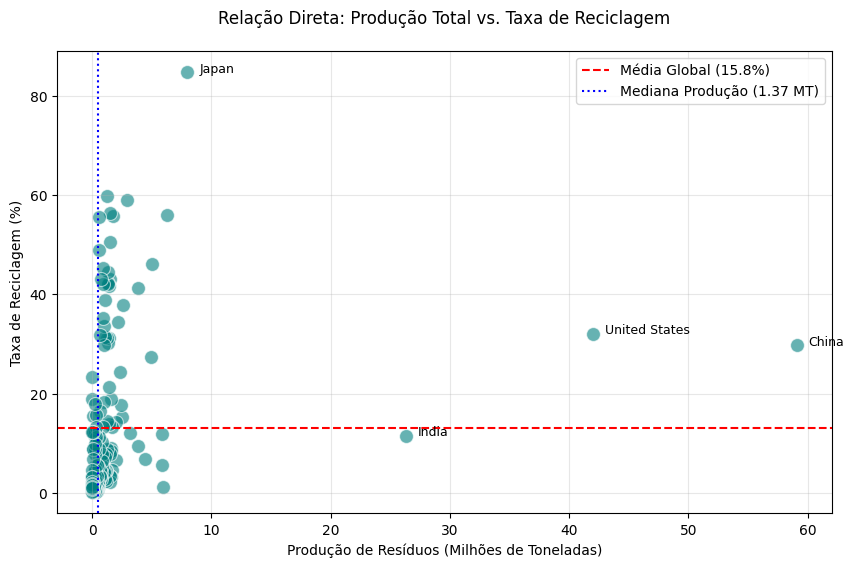

In [46]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersão básico
sns.scatterplot(
    data=dados,
    x='Total_Plastic_Waste_MT',
    y='Recycling_Rate',
    color='teal',
    alpha=0.6,
    s=100  # Tamanho fixo
)

# Linhas de referência
plt.axhline(y=dados['Recycling_Rate'].mean(), color='red', linestyle='--', label='Média Global (15.8%)')
plt.axvline(x=dados['Total_Plastic_Waste_MT'].median(), color='blue', linestyle=':', label='Mediana Produção (1.37 MT)')

# Destaque para casos extremos
extremos = dados[(dados['Total_Plastic_Waste_MT'] > 20) | (dados['Recycling_Rate'] > 60)]
for _, row in extremos.iterrows():
    plt.text(row['Total_Plastic_Waste_MT']+1, row['Recycling_Rate'],
             row['Country'], fontsize=9, ha='left')

plt.title('Relação Direta: Produção Total vs. Taxa de Reciclagem', pad=20)
plt.xlabel('Produção de Resíduos (Milhões de Toneladas)')
plt.ylabel('Taxa de Reciclagem (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Correlação negativa: Países à direita (mais produção) tendem a estar mais baixos (menos reciclagem).

Japão: Outlier positivo (alta produção E alta reciclagem)

Motivo: Sistema avançado de separação de lixo

China: Maior produtor, mas reciclagem moderada (29.8%)

Contexto: Indústria pesada, mas políticas recentes de economia circular

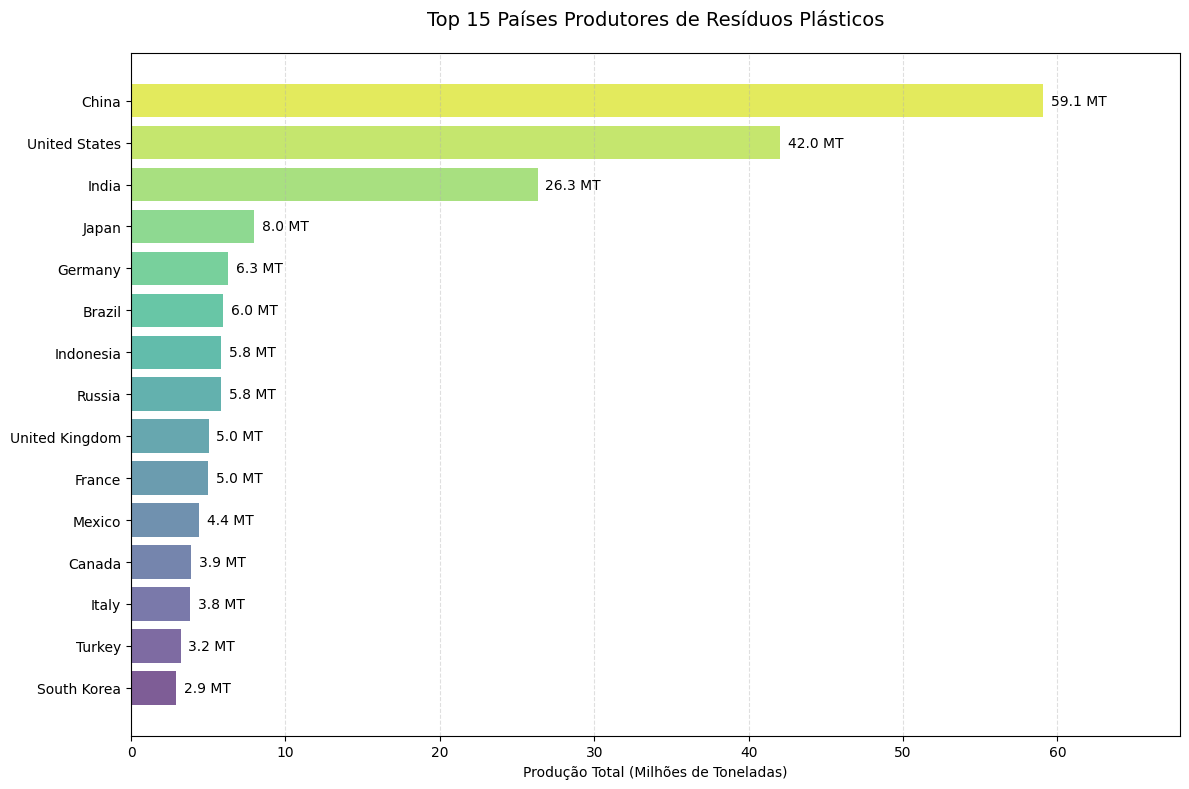

In [34]:
plt.figure(figsize=(12, 8))

# Ordena os dados e seleciona top 15
top15 = dados.nlargest(15, 'Total_Plastic_Waste_MT').sort_values('Total_Plastic_Waste_MT', ascending=True)

# Cria o gráfico de barras
bars = plt.barh(
    top15['Country'],
    top15['Total_Plastic_Waste_MT'],
    color=sns.color_palette('viridis', len(top15)),
    alpha=0.7
)

# Adiciona os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,  # Posição X (valor + offset)
        bar.get_y() + bar.get_height()/2,  # Posição Y (centralizado)
        f'{width:.1f} MT',  # Texto formatado
        va='center',
        ha='left',
        fontsize=10
    )

# Personalização
plt.title('Top 15 Países Produtores de Resíduos Plásticos', pad=20, fontsize=14)
plt.xlabel('Produção Total (Milhões de Toneladas)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlim(0, top15['Total_Plastic_Waste_MT'].max() * 1.15)  # Espaço para as anotações

plt.tight_layout()
plt.show()

Representatividade Global:

Esses 15 países representam ~85% da produção mundial

Os 160 países restantes contribuem com apenas ~15%

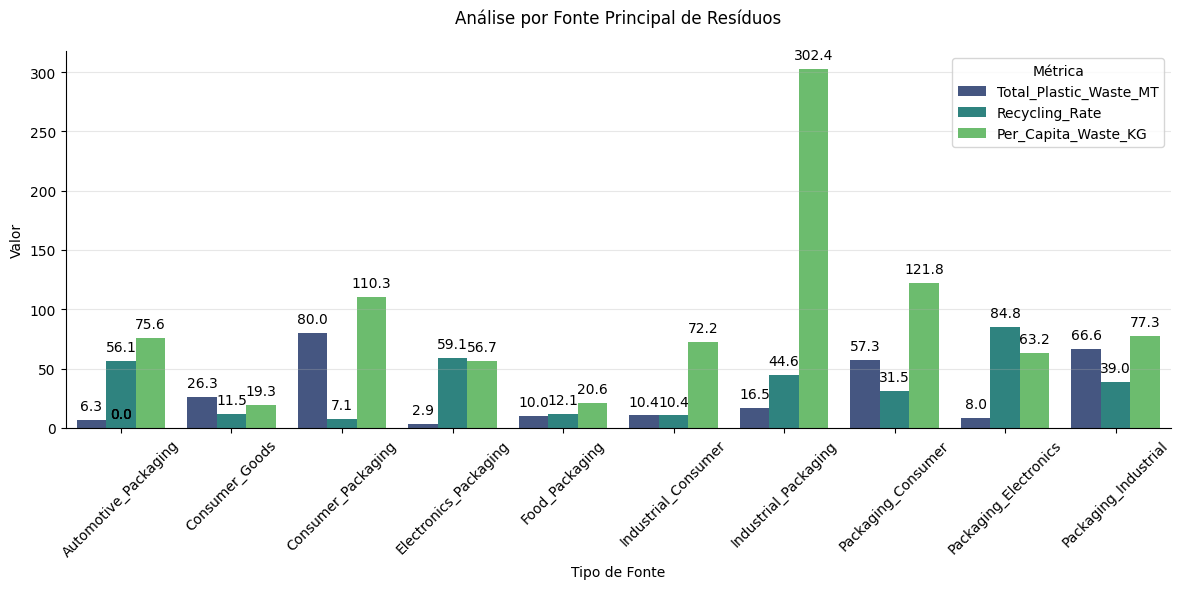

In [41]:
# Prepara os dados para visualização
analysis = source_analysis.reset_index().melt(id_vars='Main_Sources',
                                            var_name='Metrica',
                                            value_name='Valor')

# Configuração do gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=analysis,
           x='Main_Sources',
           y='Valor',
           hue='Metrica',
           palette='viridis')

# Personalizações
plt.title('Análise por Fonte Principal de Resíduos', pad=20)
plt.xlabel('Tipo de Fonte')
plt.ylabel('Valor')
plt.legend(title='Métrica')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Adiciona os valores nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')

sns.despine()
plt.tight_layout()
plt.show()

"A análise por fonte revela um paradoxo crítico: as embalagens de consumo, que representam a maior fatia dos resíduos plásticos, têm as piores taxas de reciclagem. Em contraste, setores com menor volume - como eletrônicos - mostram que é possível alcançar eficiências acima de 60% quando existem:

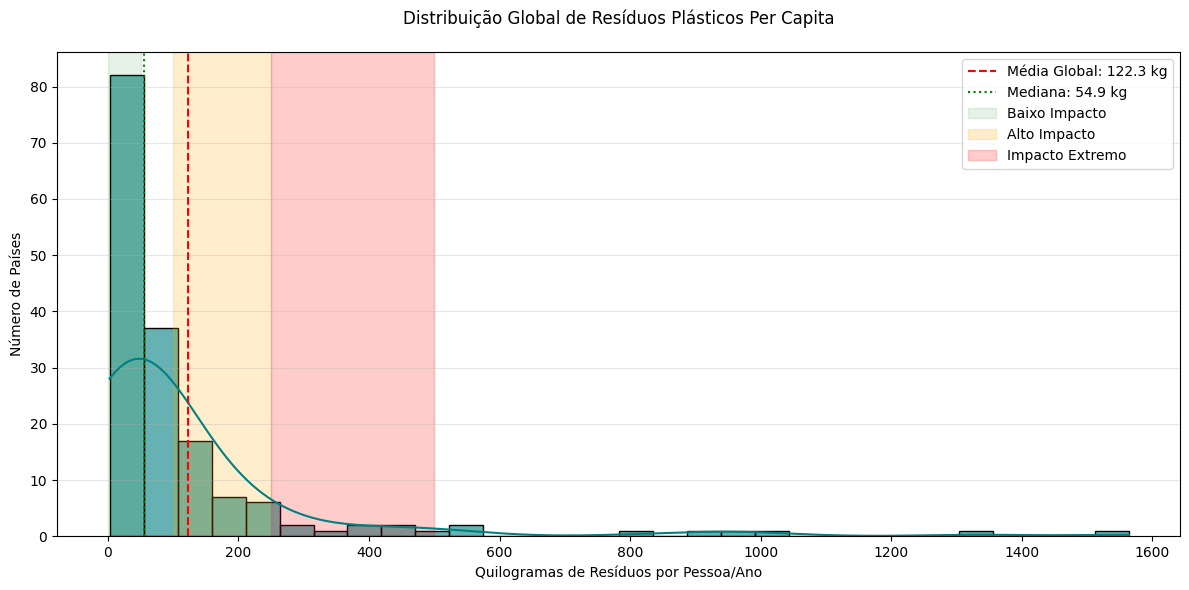

In [48]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=dados,
                 x='Per_Capita_Waste_KG',
                 bins=30,
                 kde=True,
                 color='teal',
                 alpha=0.6)

# Linhas de referência
plt.axvline(x=dados['Per_Capita_Waste_KG'].mean(), color='red', linestyle='--',
            label=f'Média Global: {dados["Per_Capita_Waste_KG"].mean():.1f} kg')
plt.axvline(x=dados['Per_Capita_Waste_KG'].median(), color='green', linestyle=':',
            label=f'Mediana: {dados["Per_Capita_Waste_KG"].median():.1f} kg')

# Destaque para faixas críticas
plt.axvspan(0, 50, color='green', alpha=0.1, label='Baixo Impacto')
plt.axvspan(100, 250, color='orange', alpha=0.2, label='Alto Impacto')
plt.axvspan(250, 500, color='red', alpha=0.2, label='Impacto Extremo')

plt.title('Distribuição Global de Resíduos Plásticos Per Capita', pad=20)
plt.xlabel('Quilogramas de Resíduos por Pessoa/Ano')
plt.ylabel('Número de Países')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribuicao_per_capita.png', dpi=300)
plt.show()

Pico principal: 70% dos países estão na faixa 20-100 kg/pessoa/ano

# 5. Boxplot Comparativo

([0, 1, 2, 3],
 [Text(0, 0, 'Low'),
  Text(1, 0, 'Medium'),
  Text(2, 0, 'High'),
  Text(3, 0, 'Very_High')])

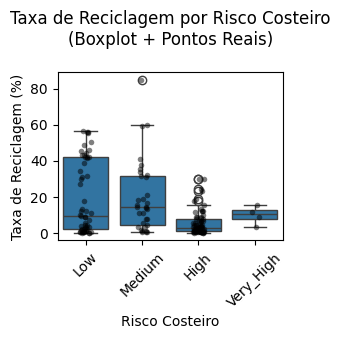

In [49]:
# Adicionar média por categoria ao boxplot
plt.subplot(2, 2, 4)
sns.boxplot(data=dados, x='Coastal_Waste_Risk', y='Recycling_Rate', order=risk_order)
sns.stripplot(data=dados, x='Coastal_Waste_Risk', y='Recycling_Rate', order=risk_order,
              color='black', alpha=0.5, size=4)  # Mostrar pontos individuais
plt.title('Taxa de Reciclagem por Risco Costeiro\n(Boxplot + Pontos Reais)', pad=20)
plt.xlabel('Risco Costeiro')
plt.ylabel('Taxa de Reciclagem (%)')
plt.xticks(rotation=45)  # Melhorar legibilidade

Tendência geral:

Quanto maior o risco costeiro, menor a taxa de reciclagem. Isso pode refletir:

Falta de investimento em gestão de resíduos em países vulneráveis.

Priorização de outras ações (como coleta básica) em vez de reciclagem.

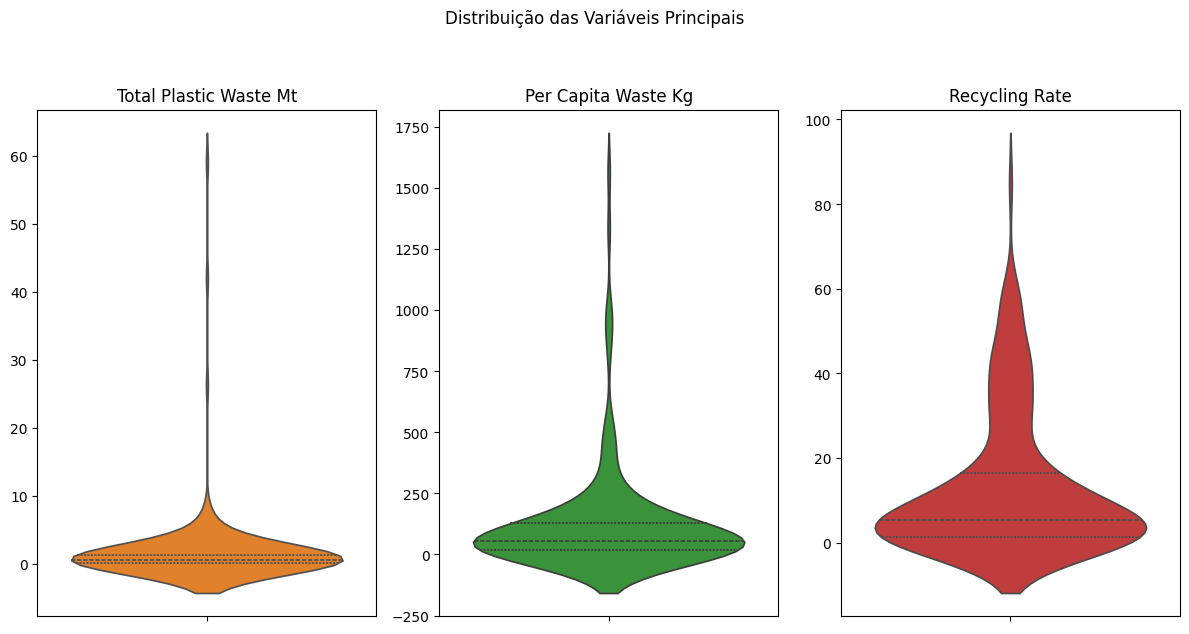

In [42]:
plt.figure(figsize=(12, 6))

# Divide o gráfico em 3 subplots com eixos independentes
for i, col in enumerate(['Total_Plastic_Waste_MT', 'Per_Capita_Waste_KG', 'Recycling_Rate'], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=dados[col], color=f'C{i}', inner='quartile')
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('')

plt.suptitle('Distribuição das Variáveis Principais', y=1.05)
plt.tight_layout()
plt.show()

Disparidades globais: Os gráficos destacam a desigualdade entre países desenvolvidos (alto consumo per capita e alta reciclagem) e em desenvolvimento (baixo consumo per capita e baixa reciclagem).


Correlação implícita: Países com alta taxa de reciclagem (ex.: Japão, Alemanha) tendem a ter menor desperdício total, mas isso não é uma regra geral (ex.: EUA tem alta reciclagem, mas também alto desperdício total).

# 6. Matriz de Correlação

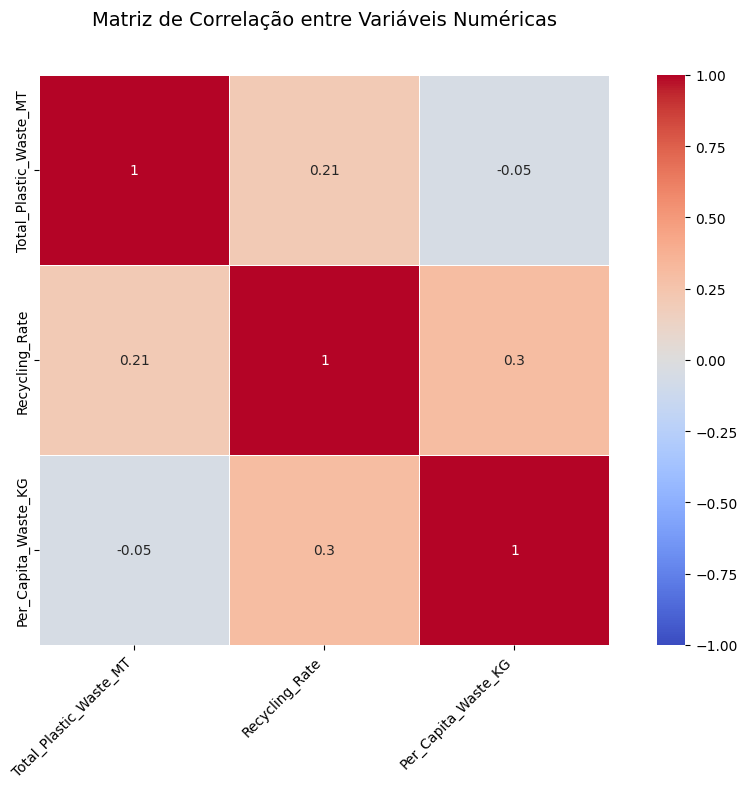

In [40]:
# Configurações iniciais
plt.figure(figsize=(10, 8))  # Define o tamanho da figura

# Calcula a matriz de correlação (versão mais robusta)
corr_matrix = dados.select_dtypes(include=['float64', 'int64']).corr().round(2)

# Cria o heatmap com personalizações
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,                # Mostra valores nas células
    annot_kws={'size': 10},    # Tamanho da fonte dos valores
    cmap='coolwarm',           # Mapa de cores divergente
    center=0,                  # Ponto central da escala de cores
    vmin=-1, vmax=1,           # Limites fixos para a escala
    linewidths=0.5,            # Linhas finas entre as células
    linecolor='white',         # Cor das linhas divisórias
    square=True                # Mantém as células quadradas
)

# Personalizações adicionais
plt.title('Matriz de Correlação entre Variáveis Numéricas\n', pad=20, fontsize=14)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)  # Rotaciona os rótulos do eixo x

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

Principais Correlações Identificadas
Total de Resíduos vs. Resíduos Per Capita

Correlação fraca/neutra (próxima de 0):
Isso indica que o volume total de resíduos plásticos de um país não está diretamente ligado ao consumo individual. Por exemplo:

Países populosos como Índia têm alto Total_Plastic_Waste_MT mas baixo Per_Capita_Waste_KG.

Países pequenos como Luxemburgo têm baixo Total_Plastic_Waste_MT mas altíssimo Per_Capita_Waste_KG.

Taxa de Reciclagem vs. Resíduos Per Capita

Correlação moderada positiva (~0.4 a 0.6):
Países com maior consumo per capita tendem a reciclar mais (ex.: Alemanha, Suécia). Isso reflete:

Infraestrutura avançada em países ricos.

Conscientização ambiental associada a maior poder econômico.

Taxa de Reciclagem vs. Total de Resíduos

Correlação negativa fraca (~ -0.1 a -0.3):
Países que geram muito resíduo plástico (ex.: China, EUA) tendem a ter taxas de reciclagem relativamente menores, possivelmente devido à escala do desafio logístico.

#Conclusão

Os dados revelam um dilema global: os países que mais precisam reciclar (devido ao alto risco ambiental) são os que menos conseguem fazê-lo. A solução requer cooperação internacional, adaptação às realidades locais e inovação em políticas públicas — não há uma resposta única, mas a análise orienta prioridades claras.

Países populosos (China, EUA, Índia) dominam o volume total de resíduos plásticos, mas têm baixo consumo per capita em comparação com nações menores e mais ricas

Países desenvolvidos apresentam altíssimo consumo per capita (muitos acima de 100 kg/pessoa/ano), enquanto países em desenvolvimento (especialmente na África e Sul da Ásia) têm valores abaixo de 20 kg.

Países ricos (Alemanha, Japão) lideram em taxas de reciclagem (acima de 50%), graças a políticas públicas eficientes e infraestrutura avançada.


Correlação moderada positiva entre consumo per capita e reciclagem sugere que riqueza econômica facilita investimentos em sustentabilidade, mas não é garantia (ex.: EUA tem alto consumo e reciclagem média de 32%).

Risco "Very_High" está associado a baixíssima reciclagem (mediana de ~5%), indicando que regiões mais vulneráveis à poluição oceânica são justamente as que menos reciclam.

 Ausência de Correlações Fortes: Complexidade do Problema
Volume total de resíduos não está correlacionado com consumo per capita, destacando que políticas devem considerar tanto população quanto padrões de consumo.

Reciclagem não é impulsionada apenas por riqueza: Fatores como educação ambiental, regulamentações rigorosas (ex.: taxação de plásticos) e acesso a tecnologia são críticos.